In [1]:
from fealpy.mesh.level_set_function import dcircle, drectangle, ddiff 
from fealpy.mesh.level_set_function import DistDomain2d 
from fealpy.mesh.distmesh import DistMesh2d
from fealpy.mesh.sizing_function  import huniform

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
from time import time

In [2]:
def init():
    return lines, points

def animate(i):
    global distmesh2d, dt
    distmesh2d.step(dt)
    point = distmesh2d.mesh.point
    edge = distmesh2d.mesh.ds.edge
    NE = edge.shape[0]
    xy = np.ones((3*NE, 2),dtype=np.float)
    xy[0::3,:] = point[edge[:,0],:]
    xy[1::3,:] = point[edge[:,1],:]
    xy[2::3,:] = np.nan
    lines.set_data(xy[:,0], xy[:,1])
    points.set_data(point[:,0], point[:,1])
    return lines, points

 

TypeError: cannot unpack non-iterable PolyCollection object

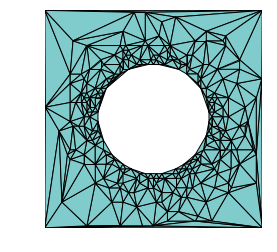

In [3]:
fd = lambda p: ddiff(drectangle(p,[-1,1,-1,1]), dcircle(p, (0,0),0.5))
fh = lambda p: 0.05+0.3*dcircle(p,(0,0),0.5)
bbox = [-1.2, 1.2, -1.2, 1.2]
pfix = np.array([[-1,-1],[-1,1], [1,-1], [1,1]], dtype=np.float)
h0 = 0.05

domain = DistDomain2d(fd, fh, bbox, pfix)
distmesh2d = DistMesh2d(domain, h0)
dt = 0.2

fig = plt.figure()
axes = plt.axes(xlim=(-1.2,1.2),ylim=(-1.2,1.2))
lines, points = distmesh2d.mesh.add_plot(axes)

interval = 1000 * dt 
ani = animation.FuncAnimation(fig, animate, frames=300, interval=interval, blit=True, init_func=init)
plt.show()